In [3]:
import pandas as pd   #for data preprocessing
import seaborn as sns
import numpy as np            #for linear algebra
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df = df.iloc[ : , 2: ]          #works on numerical data

In [6]:
df.head()  #starting 5

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
df.sample(7)       #any random

,Age,EstimatedSalary,Purchased
358,40,71000,1
352,42,90000,1
292,55,39000,1
322,41,52000,0
218,46,96000,0
127,26,32000,0
36,33,28000,0


RECOMMENDED to do train-test-split

In [8]:
from sklearn.model_selection import train_test_split
#this time used seperately x and y as eariler                                                      #30% test set
x_train , x_test , y_train , y_test = train_test_split(df.drop('Purchased' , axis =1), df['Purchased'] ,test_size = 0.3 , random_state = 0)

# for x -drop('Purchased', axis=1) means:'Purchased': The column to remove(drop) , axis=1: Refers to columns(to be droped not rows).
# for y -['Purchased']: Selects only this column as a Series (1D array) so in o/p
# do not print col print only row as its only one series(1d array) , dothis_toprintname ofcolumn printsDataframe(2Darr) df[['Purchased']] (120,1)

print( x_train.shape , x_test.shape )
print( y_train.shape , y_test.shape ) # returns

(280, 2) (120, 2)
(280,) (120,)


       StandardScaler : -

In [9]:
from sklearn.preprocessing import StandardScaler  #transforms the data so that it has s.d of 1 and mean =0
sc = StandardScaler()

#fit method to calc mean and s.d
sc.fit(x_train)        #learns the parameters of x_train and apply transformation to both x_train&test

x_train_scaled = sc.transform(x_train)    #tranformation to trained data means applying formula
x_test_scaled  = sc.transform(x_test)
#When you use sc.transform(x_train), it converts the scaled values into a NumPy array because
# StandardScaler is part of scikit-learn, which works primarily with arrays for efficient computations.



In [30]:
sc.mean_       #mean of the both x column before scaling

array([3.78642857e+01, 6.98071429e+04])

In [31]:
x_train_scaled.mean() #converted_to_0

,0
Age,3.489272e-17
EstimatedSalary,6.344132e-17


In [11]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [12]:
x_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [13]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [14]:
# so have to conv the array into pandas df for tabular format
#When you apply StandardScaler, the output (x_train_scaled) is a NumPy array,
#which does not have column names—just raw values.
#To make the data readable and structured like the original Pandas DataFrame, we
#reassign the original column names.


x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [15]:
#calculates statistical metrics for all numerical columns in x_train.
x_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [16]:
#p.round(data, 1) rounds all values in x_train.describe() to one decimal place.
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


EFFECT OF *SCALING*



'Creates a single figure (fig) with two columns (ncols=2)\nax1 → Left plot (Before Scaling).\nax2 → Right plot (After Scaling).'

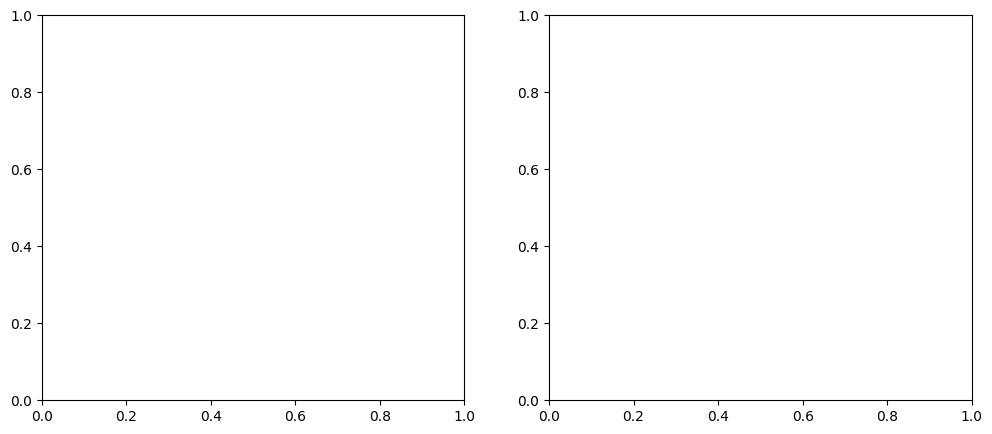

In [17]:
figure  , ( axes1 , axes2 ) = plt.subplots( ncols = 2 , figsize = (12 , 5 ) )
#unit is inches, so (12, 5) means 12 inches wide and 5 inches tall.
"""Creates a single figure (fig) with two columns (ncols=2)
ax1 → Left plot (Before Scaling).
ax2 → Right plot (After Scaling)."""

In [18]:
axes1.scatter(x_train['Age'] , x_train['EstimatedSalary'] )
axes1.set_title('before scaling')


Text(0.5, 1.0, 'before scaling')

In [19]:
axes2.scatter(x_train_scaled['Age'] , x_train_scaled['EstimatedSalary'] , color = 'red' )
axes2.set_title('after scaling')


Text(0.5, 1.0, 'after scaling')

In [20]:
plt.show()

Text(0.5, 1.0, 'AFTER scaling')

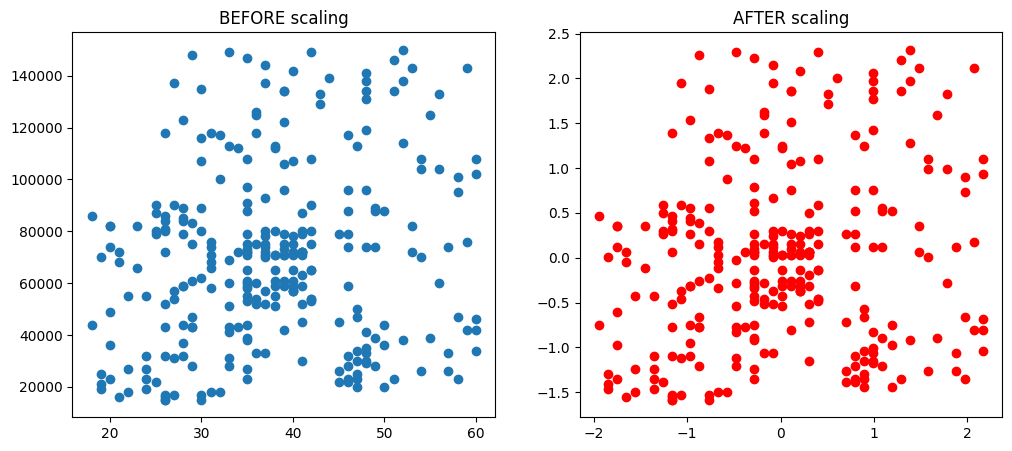

In [21]:
figure  , ( axes1 , axes2 ) = plt.subplots( ncols = 2 , figsize = (12 , 5 ) )
#unit is inches, so (12, 5) means 12 inches wide and 5 inches tall.
"""Creates a single figure (fig) with two columns (ncols=2)
ax1 → Left plot (Before Scaling).
ax2 → Right plot (After Scaling)."""
axes1.scatter(x_train['Age'] , x_train['EstimatedSalary'] )
axes1.set_title('BEFORE scaling')
axes2.scatter(x_train_scaled['Age'] , x_train_scaled['EstimatedSalary'] , color = 'red' )
axes2.set_title('AFTER scaling')


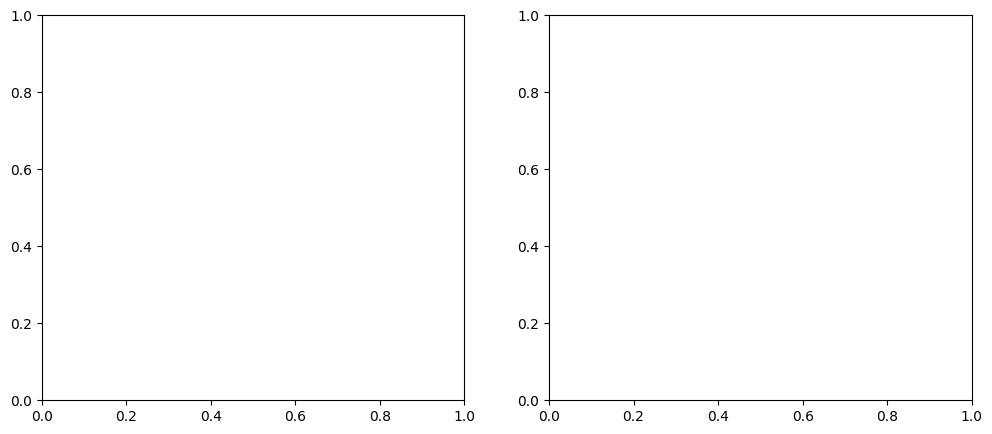

In [22]:
figure , (axes1 , axes2 ) = plt.subplots( ncols =2 , figsize = (12 ,5 ) )


In [24]:
axes1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax = axes1)
sns.kdeplot(x_train['EstimatedSalary'], ax = axes1 )
plt.show()

In [25]:
# after scaling
axes2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=axes2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=axes2)
plt.show()

<Axes: title={'center': 'After Standard Scaling'}, xlabel='Age', ylabel='Density'>

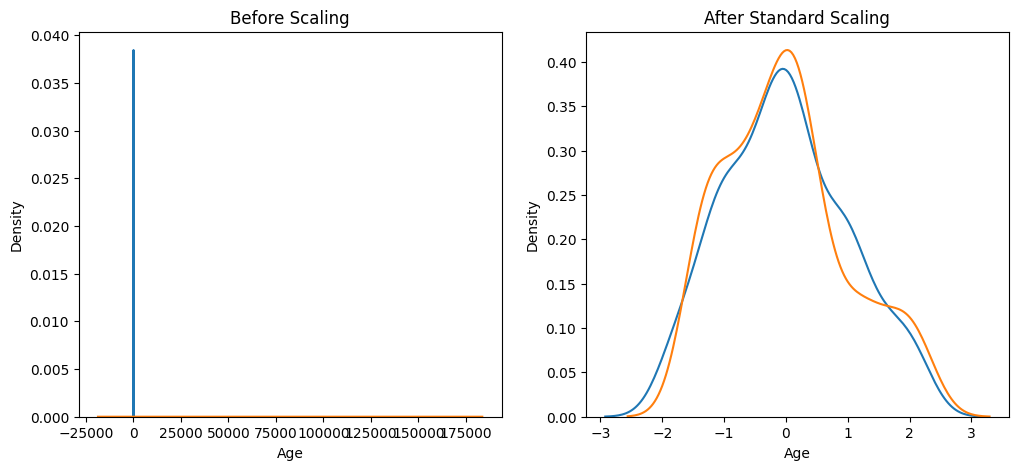

In [27]:
figure , (axes1 , axes2 ) = plt.subplots( ncols =2 , figsize = (12 ,5 ) )
axes1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax = axes1)
sns.kdeplot(x_train['EstimatedSalary'], ax = axes1 )
axes2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=axes2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=axes2)

In [28]:
# Pandas DataFrame stores data in tabular form,  while .values extracts onlythe raw numerical values as a NumPy array.
# Efficient Computations – NumPy operations are faster and consume less memory compared to Pandas operations.
# Required by Some ML Libraries – Many machine learning libraries (like Scikit-Learn) expect input in the form of a NumPy array instead of a Pandas DataFrame